In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import warnings; warnings.simplefilter('ignore')

countries_file = 'D:\Aida\Desktop\ІАД\Papushyna_iad\Country-data-copy.csv'

countries_columns = ['Name', 'Children mortality', 'Exports', 'Health', 'Imports', 'Income', 'Inflation', 'Life expectancy', 'Total Fertility', 'GDP']

countries = pd.read_csv(countries_file, sep=',', header=None, names=countries_columns, engine='python')

In [ ]:
print(countries.head())

print(countries.info())

countries = countries.dropna()

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(countries['Life expectancy'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Life expectancy', data=countries, color='coral')
plt.title('Income vs Life Expectancy')
plt.xlabel('Income')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))

correlation_matrix = np.corrcoef(countries.drop('Name', axis = 1).transpose())
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.show()

In [ ]:
Q1_child = countries['Children mortality'].quantile(0.25)
Q3_child = countries['Children mortality'].quantile(0.75)
IQR_child = Q3_child - Q1_child

outliers_child_mortality = (countries['Children mortality'] < (Q1_child - 1.5 * IQR_child)) | (countries['Children mortality'] > (Q3_child + 1.5 * IQR_child))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Children mortality'])
plt.title('Box Plot of Children mortality')
plt.show()
print("Outliers in Children mortality:\n", countries.loc[outliers_child_mortality, ['Name', 'Children mortality']])

In [ ]:
Q1_exports = countries['Exports'].quantile(0.25)
Q3_exports = countries['Exports'].quantile(0.75)
IQR_exports = Q3_exports - Q1_exports

outliers_exports = (countries['Exports'] < (Q1_exports - 1.5 * IQR_exports)) | (countries['Exports'] > (Q3_exports + 1.5 * IQR_exports))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Exports'])
plt.title('Box Plot of Exports')
plt.show()
print("Outliers in Exports:\n", countries.loc[outliers_exports, ['Name', 'Exports']])

In [ ]:
Q1_health = countries['Health'].quantile(0.25)
Q3_health = countries['Health'].quantile(0.75)
IQR_health = Q3_health - Q1_health

outliers_health = (countries['Health'] < (Q1_health - 1.5 * IQR_health)) | (countries['Health'] > (Q3_health + 1.5 * IQR_health))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Health'])
plt.title('Box Plot of Health')
plt.show()
print("Outliers in Health:\n", countries.loc[outliers_health, ['Name', 'Health']])

In [ ]:
Q1_imports = countries['Imports'].quantile(0.25)
Q3_imports = countries['Imports'].quantile(0.75)
IQR_imports = Q3_imports - Q1_imports

outliers_imports = (countries['Imports'] < (Q1_imports - 1.5 * IQR_imports)) | (countries['Imports'] > (Q3_imports + 1.5 * IQR_imports))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Imports'])
plt.title('Box Plot of Imports')
plt.show()
print("Outliers in Imports:\n", countries.loc[outliers_imports, ['Name', 'Imports']])

In [ ]:
Q1_income = countries['Income'].quantile(0.25)
Q3_income = countries['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

outliers_income = (countries['Income'] < (Q1_income - 1.5 * IQR_income)) | (countries['Income'] > (Q3_income + 1.5 * IQR_income))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Income'])
plt.title('Box Plot of Income')
plt.show()
print("Outliers in Income:\n", countries.loc[outliers_income, ['Name', 'Income']])

In [ ]:
Q1_inflation = countries['Inflation'].quantile(0.25)
Q3_inflation = countries['Inflation'].quantile(0.75)
IQR_inflation = Q3_inflation - Q1_inflation

outliers_inflation = (countries['Inflation'] < (Q1_inflation - 1.5 * IQR_inflation)) | (countries['Inflation'] > (Q3_inflation + 1.5 * IQR_inflation))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Inflation'])
plt.title('Box Plot of Inflation')
plt.show()
print("Outliers in Inflation:\n", countries.loc[outliers_inflation, ['Name', 'Inflation']])

In [ ]:
Q1_life = countries['Life expectancy'].quantile(0.25)
Q3_life = countries['Life expectancy'].quantile(0.75)
IQR_life = Q3_life - Q1_life

outliers_life = (countries['Life expectancy'] < (Q1_life - 1.5 * IQR_life)) | (countries['Life expectancy'] > (Q3_life + 1.5 * IQR_life))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Life expectancy'])
plt.title('Box Plot of Life Expectancy')
plt.show()

print("Outliers in Life Expectancy:", countries.loc[outliers_life, ['Name', 'Life expectancy']])

In [ ]:
Q1_total_fertility = countries['Total Fertility'].quantile(0.25)
Q3_total_fertility = countries['Total Fertility'].quantile(0.75)
IQR_total_fertility = Q3_total_fertility - Q1_total_fertility

outliers_total_fertility = (countries['Total Fertility'] < (Q1_total_fertility - 1.5 * IQR_total_fertility)) | (countries['Total Fertility'] > (Q3_total_fertility + 1.5 * IQR_total_fertility))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Total Fertility'])
plt.title('Box Plot of Total Fertility')
plt.show()
print("Outliers in Total Fertility:\n", countries.loc[outliers_total_fertility, ['Name', 'Total Fertility']])

In [ ]:
Q1_gdp = countries['GDP'].quantile(0.25)
Q3_gdp = countries['GDP'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

outliers_gdp = (countries['GDP'] < (Q1_gdp - 1.5 * IQR_gdp)) | (countries['GDP'] > (Q3_gdp + 1.5 * IQR_gdp))

plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['GDP'])
plt.title('Box Plot of GDP')
plt.show()
print("Outliers in GDP:\n", countries.loc[outliers_gdp, ['Name', 'GDP']])

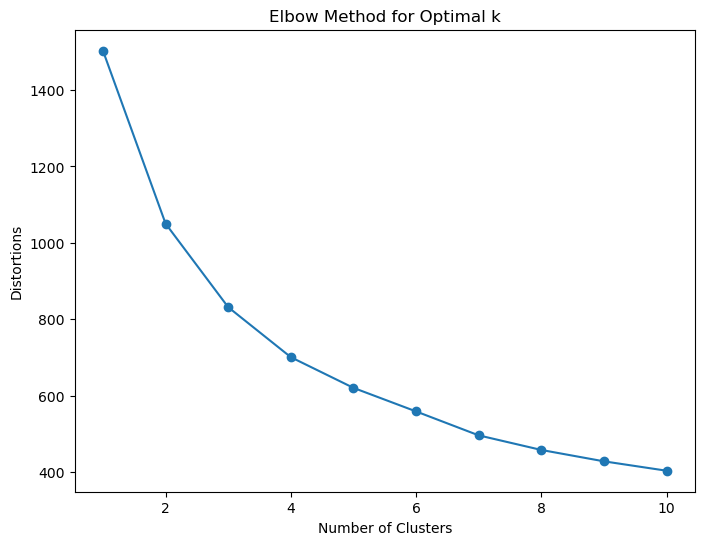

In [3]:
data = countries.drop('Name', axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.show()

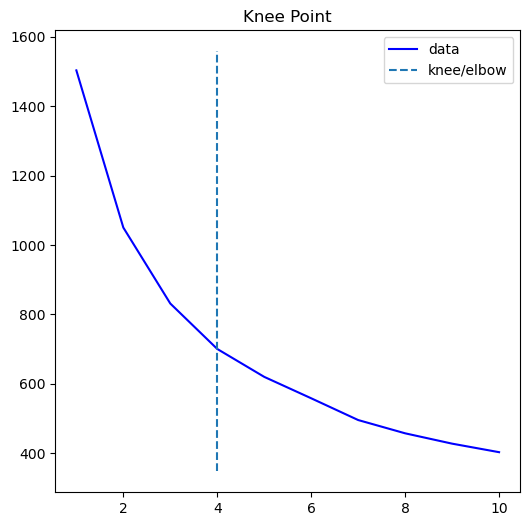

In [5]:
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
optimal_k = kl.elbow
kl.plot_knee()
plt.show()

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
countries['Cluster'] = kmeans_optimal.fit_predict(data_scaled)

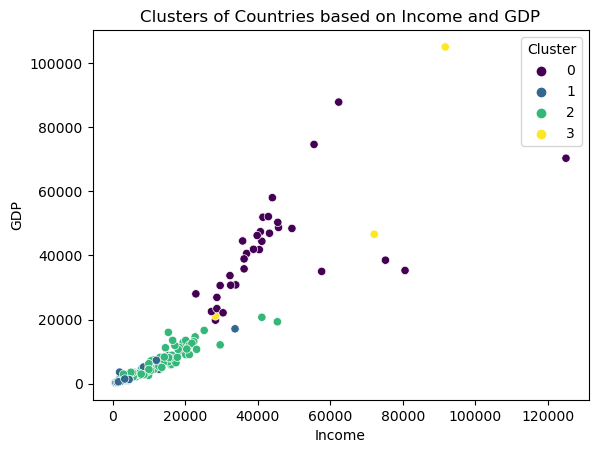

In [6]:
sns.scatterplot(x='Income', y='GDP', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on Income and GDP')
plt.xlabel('Income')
plt.ylabel('GDP')
plt.show()

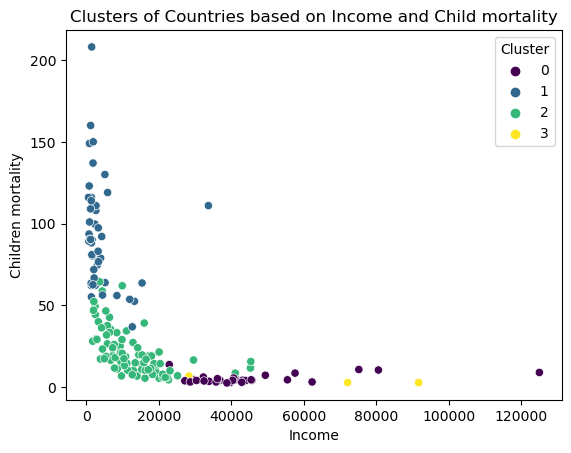

In [8]:
sns.scatterplot(x='Income', y='Children mortality', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on Income and Child mortality')
plt.xlabel('Income')
plt.ylabel('Children mortality')
plt.show()

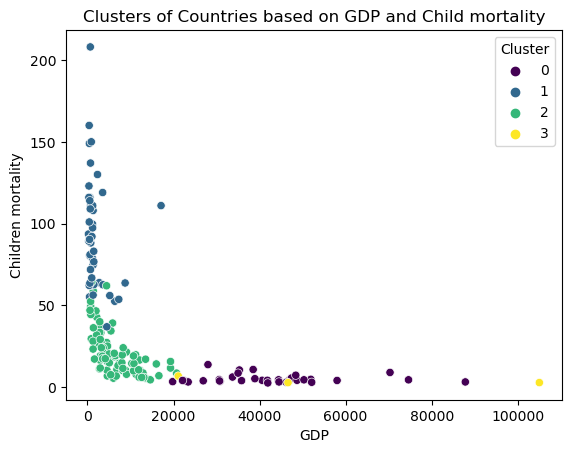

In [9]:
sns.scatterplot(x='GDP', y='Children mortality', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on GDP and Child mortality')
plt.xlabel('GDP')
plt.ylabel('Children mortality')
plt.show()